## I. Introduction
L'objectif de ce projet est de prédire la qualité d'un vin, notée sur une échelle de 1 à 10, à partir de ses différentes propriétés chimiques et de son type (vin rouge ou vin blanc). Nous disposons d'un jeu de données répertoriant plus de 6000 vins et 12 variables explicatives. Bien que ce problème puisse être abordé sous l'angle de la classification, nous le considérons ici comme un problème de régression.

## II. Exploration et visualisation des données

In [6]:
import pandas as pd # data processing, CSV file (e.g. pd.read_csv)

In [7]:
df = pd.read_csv(r"C:\Users\Pc\Desktop\projet prediction de la qualite du vin\wine_train.csv") #lire le dataset

In [8]:
df.shape #(4547, 14)

(4547, 14)

In [9]:
df.columns #Index(['wine_ID', 'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide',
           #'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
           #'wine_type', 'target'],
           #dtype='object')

Index(['wine_ID', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'wine_type', 'target'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_ID               4547 non-null   int64  
 1   fixed acidity         4547 non-null   float64
 2   volatile acidity      4547 non-null   float64
 3   citric acid           4547 non-null   float64
 4   residual sugar        4547 non-null   float64
 5   chlorides             4547 non-null   float64
 6   free sulfur dioxide   4547 non-null   float64
 7   total sulfur dioxide  4547 non-null   float64
 8   density               4547 non-null   float64
 9   pH                    4547 non-null   float64
 10  sulphates             4547 non-null   float64
 11  alcohol               4547 non-null   float64
 12  wine_type             4547 non-null   int64  
 13  target                4547 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 497.5 KB


In [11]:
df["wine_type"] = df["wine_type"].astype("category")#on transforme la variable qui devrait etre categorielle en variable categorielle

In [12]:
df.info() #on peut remarquer que maintenant le type de la variable 'wine_type' est category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   wine_ID               4547 non-null   int64   
 1   fixed acidity         4547 non-null   float64 
 2   volatile acidity      4547 non-null   float64 
 3   citric acid           4547 non-null   float64 
 4   residual sugar        4547 non-null   float64 
 5   chlorides             4547 non-null   float64 
 6   free sulfur dioxide   4547 non-null   float64 
 7   total sulfur dioxide  4547 non-null   float64 
 8   density               4547 non-null   float64 
 9   pH                    4547 non-null   float64 
 10  sulphates             4547 non-null   float64 
 11  alcohol               4547 non-null   float64 
 12  wine_type             4547 non-null   category
 13  target                4547 non-null   int64   
dtypes: category(1), float64(11), int64(2)
memory usage: 466.

In [13]:
df.head(10) #les 10 premieres lignes

,wine_ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,target
0,2137,7.2,0.160,0.26,7.1,0.054,41.0,224.0,0.99660,3.38,0.55,10.100000,0,5
1,2652,7.3,0.220,0.31,2.3,0.018,45.0,80.0,0.98936,3.06,0.34,12.900000,0,7
2,1544,8.9,0.130,0.49,1.0,0.028,6.0,24.0,0.99260,2.91,0.32,9.900000,0,5
3,3447,6.0,0.170,0.29,9.7,0.044,33.0,98.0,0.99536,3.12,0.36,9.200000,0,6
4,1067,7.5,0.190,0.34,2.6,0.037,33.0,125.0,0.99230,3.10,0.49,11.100000,0,7
5,2026,6.4,0.260,0.40,1.7,0.179,5.0,60.0,0.99250,3.09,0.54,10.100000,0,5
6,4528,6.4,0.370,0.19,3.5,0.068,18.0,101.0,0.99340,3.03,0.38,9.000000,0,6
7,2242,6.1,0.230,0.45,10.6,0.094,49.0,169.0,0.99699,3.05,0.54,8.800000,0,5
8,4164,7.0,0.310,0.35,1.6,0.063,13.0,119.0,0.99184,3.22,0.50,10.700000,0,5
9,6257,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,1,6


In [14]:
df.duplicated().sum() # on verifie si on a des doublons
#elle renvoie: 0

0

In [15]:
for i in df.columns:
    print(i," : ",df[i].isnull().sum()) #on verifie si on a des valeurs manquantes par colonnes
    #elle renvoie des 0 

wine_ID  :  0
fixed acidity  :  0
volatile acidity  :  0
citric acid  :  0
residual sugar  :  0
chlorides  :  0
free sulfur dioxide  :  0
total sulfur dioxide  :  0
density  :  0
pH  :  0
sulphates  :  0
alcohol  :  0
wine_type  :  0
target  :  0


Le calcul des statistiques descriptives implique de calculer des mesures statistiques telles que la moyenne, l'écart-type, le minimum, le premier quartile, la médiane, le troisième quartile, le maximum pour chaque variable. Cela nous permettra d'avoir une idée des tendances centrales et de la dispersion des données.

In [16]:
df.describe()#calcul des statistiques descriptives

,wine_ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000
mean,3249.257313,7.235364,0.340110,0.318155,5.367572,0.056112,30.364416,115.502309,0.994700,3.219477,0.533006,10.496162,5.824060
std,1882.272944,1.319966,0.166643,0.142942,4.748314,0.035236,17.868751,56.989343,0.003015,0.163511,0.150728,1.179564,0.876346
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987130,2.740000,0.220000,8.000000,3.000000
25%,1618.500000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,3227.000000,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,6.000000
75%,4896.500000,7.700000,0.400000,0.390000,8.000000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,6495.000000,15.600000,1.580000,1.000000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.200000,9.000000


In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sn

[Text(0, 0.5, 'target'), Text(0.5, 1.0, 'Box Plot On target')]

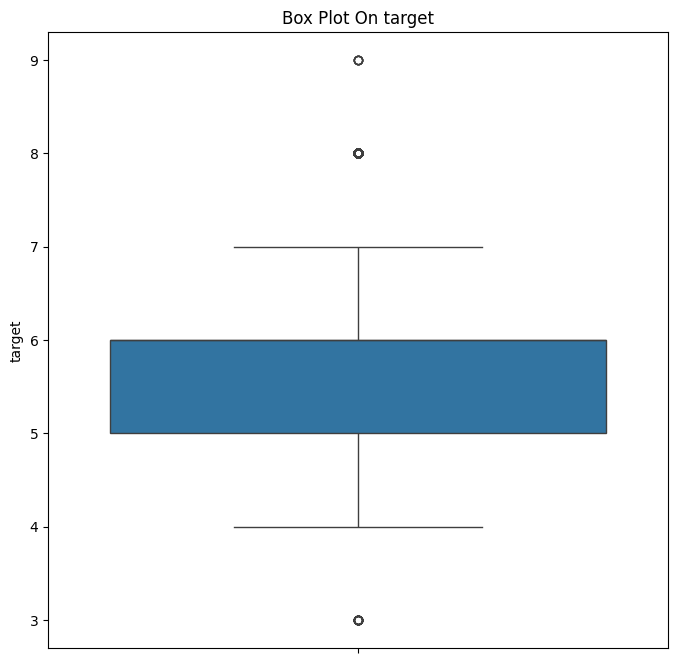

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="target",orient="v",ax=axes)

axes.set(ylabel='target',title="Box Plot On target")

[Text(0.5, 0, 'wine_type'),
 Text(0, 0.5, 'target'),
 Text(0.5, 1.0, 'Box Plot On target Across wine_type')]

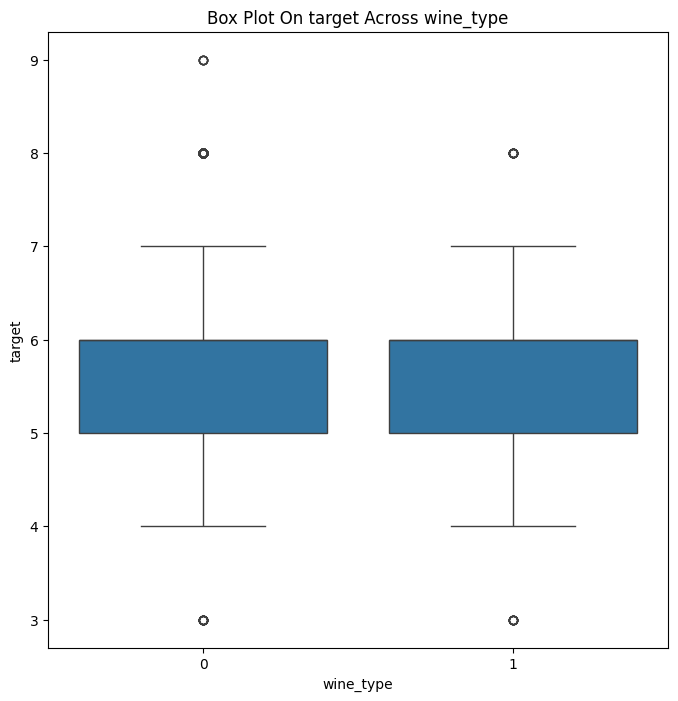

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="target",x="wine_type",orient="v",ax=axes)
axes.set(xlabel='wine_type', ylabel='target',title="Box Plot On target Across wine_type")

Dans les boxplots ci-dessus, nous voyons des points au-delà des moustaches, cela indique que visuellement nous avons pu remarquer la présence de valeurs potentiellement aberrantes. 

In [21]:
import numpy as np

Pour l'approche basique nous associerons les outliers de "target" à des individus qui ne respecte pas la fonction suivante:

In [22]:
np.abs(df["target"] - df["target"].mean()) <= (3 * df["target"].std())

0       True
1       True
2       True
3       True
4       True
        ... 
4542    True
4543    True
4544    True
4545    True
4546    True
Name: target, Length: 4547, dtype: bool

In [23]:
df.shape[0] - df[np.abs(df["target"] - df["target"].mean()) <= (3 * df["target"].std())].shape[0] 
#le nombre de valeurs aberrantes: 28
#Nous soustrayons simplement le nombre total d'observations (représenté par df.shape[0]) 
#au nombre d'observations qui satisfont la condition pour ne pas être considérées comme des outliers

28

In [24]:
df_without_outliers = df[np.abs(df["target"] - df["target"].mean()) <= (3 * df["target"].std())] 

In [25]:
df_without_outliers.shape

(4519, 14)

<Axes: >

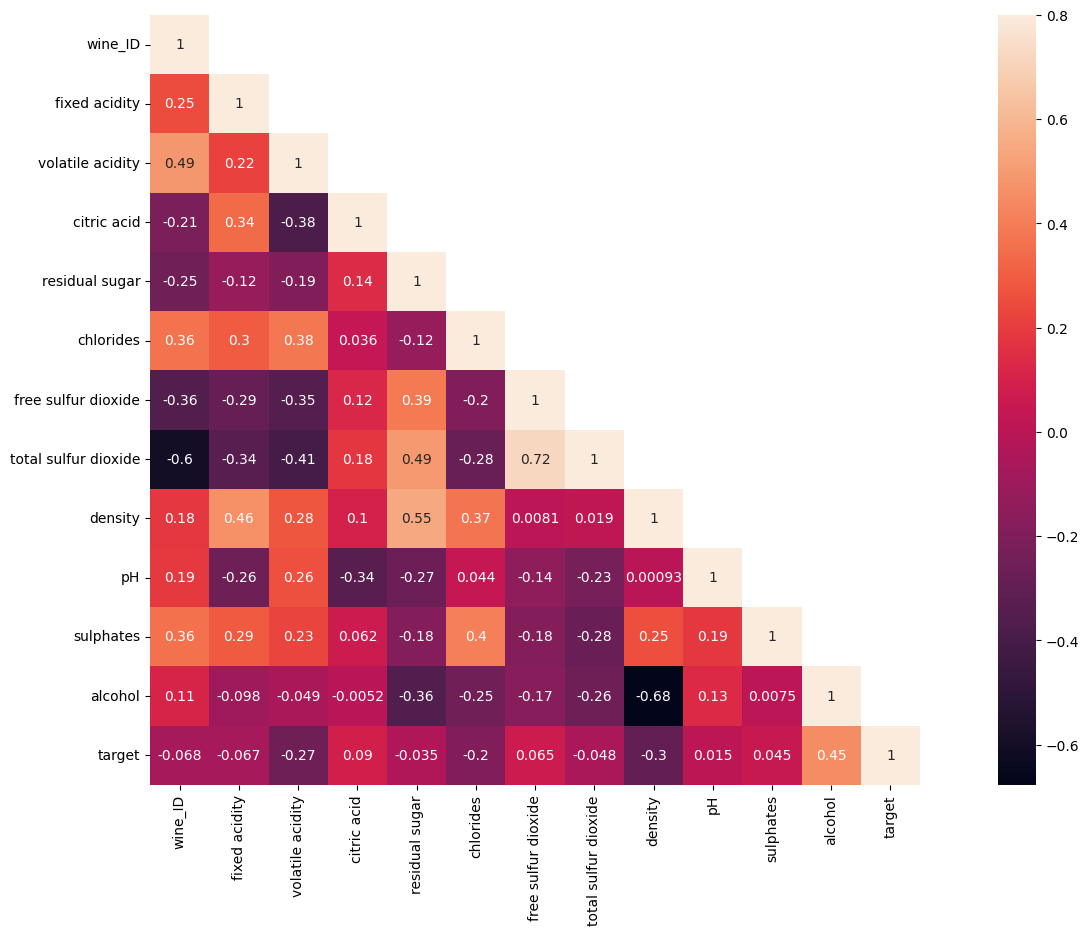

In [26]:
#etude de correlation

# Calcul de la matrice de corrélation entre les variables numériques du DataFrame df
corrMatt = df.corr(numeric_only=True)

# Création d'un masque pour cacher la partie inférieure de la matrice (qui est une duplication symétrique)
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

# - vmax : la valeur maximale pour l'échelle de couleur (limitée à 0.8)
# - square : force les cellules à être carrées
# - annot : ajoute les valeurs numériques dans chaque cellule de la carte de chaleur


## III. Modélisation
Cette partie consiste à concrétiser nos modèles de Machine Learning suite au prétraitement de nos données dans la section II.

In [27]:
import sklearn
from sklearn.model_selection import train_test_split

In [28]:
#Pour rappel notre variable à prédire est "target" et le reste est considéré comme variables prédictives (sans wine_ID).
#Il est necessaire d'isoler la variable à prédire dans une nouvelle variable Y et les variables prédictives 
#dans une variable X avant d'utiliser le train_test_split().
X = df_without_outliers.drop(['wine_ID','target'], axis=1)
Y = df_without_outliers['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #sans valeurs aberrantes
# 80% d'individus pour le train et 20% pour le test.
#on a ajout une graine avec random_state pour que l'échantillonnage se fait de la même manière à chaque lancement du code

In [29]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
#(3615, 12) (904, 12)
#(3615,) (904,)

(3615, 12) (904, 12)
(3615,) (904,)


In [30]:
X_1 = df.drop(['wine_ID','target'], axis=1)
Y_1 = df['target']
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=42) #avec valeurs aberrantes

In [31]:
print(X_train_1.shape, X_test_1.shape)
print(Y_train_1.shape, Y_test_1.shape)
#(3637, 12) (910, 12)
#(3637,) (910,)

(3637, 12) (910, 12)
(3637,) (910,)


### 3.1. La régression linéaire
Dans notre cas nous avons un régréssion linéaire multiple car nos variables explicatives sont nombreuses. Ainsi nous cherchons la meilleur droite telles que: $Y = a_{0} + a_{1}X_{1} + a_{2}X_{2} + ... + a_{12}X_{12}$.

In [32]:
from sklearn import metrics

In [33]:
#sans valeurs aberrantes et avec normalisation des donnees
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Créer un objet StandardScaler
scaler = StandardScaler()

# Ajuster le scaler aux données d'entraînement et le transformer
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lModel = LinearRegression()
# Entraîner le modèle de régression linéaire sur les données standardisées
lModel.fit(X=X_train_scaled, y=Y_train)

# Faire des prédictions sur les données de test
y_pred = lModel.predict(X=X_test_scaled)

# Calculer le coefficient de détermination (R2) sur les prédictions
from sklearn import metrics
print("R2: ", metrics.r2_score(Y_test, y_pred))#R2:  0.25488431942809464

R2:  0.25488431942809464


In [34]:
#avec valeurs aberrantes et avec normalisation des donnees
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Créer un objet StandardScaler
scaler = StandardScaler()

# Ajuster le scaler aux données d'entraînement et le transformer
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)


lModel = LinearRegression()
# Entraîner le modèle de régression linéaire sur les données standardisées
lModel.fit(X=X_train_scaled, y=Y_train_1)

# Faire des prédictions sur les données de test
y_pred = lModel.predict(X=X_test_scaled)

# Calculer le coefficient de détermination (R2) sur les prédictions
from sklearn import metrics
print("R2: ", metrics.r2_score(Y_test_1, y_pred))#R2:  0.31052155298777095

R2:  0.31052155298777095


In [35]:
#Régression linéaire avec validation croisée sans valeurs aberrantes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lm = LinearRegression()

# Train the model with 10-folds
scores = cross_val_score(lm, scaler.fit_transform(X_train), Y_train, cv = 10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.3210243818800429


Cross-validated scores: 0.3210243818800429


Cet extrait de code utilise la validation croisée pour évaluer la performance du modèle de régression linéaire. Le code calcule la moyenne des scores de validation croisée, ce qui donne une mesure globale de la performance du modèle sur différents ensembles de validation. Dans ce cas, la moyenne des scores est d'environ 0.32102.

In [36]:
#Régression linéaire avec validation croisée avec valeurs aberrantes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lm = LinearRegression()

# Train the model with 10-folds
scores = cross_val_score(lm, scaler.fit_transform(X_train_1), Y_train_1, cv = 10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.2952775664124525

Cross-validated scores: 0.2952775664124525


### 3.2. Lasso

Le modèle de régression Lasso cherche à minimiser la somme des moindres carrés (comme dans la régression linéaire), tout en ajoutant une pénalité L1 (valeur absolue des coefficients) à la fonction de coût.  Cela s'exprime mathématiquement comme suit :

Minimisation : Σ(yᵢ - ŷᵢ)² + $\alpha$Σ|aᵢ|

où : 

Σ représente la somme sur l'ensemble des échantillons.
yᵢ est la valeur cible (observation) pour le i-ème échantillon.
ŷᵢ est la valeur prédite pour le i-ème échantillon.
aᵢ sont les coefficients du modèle.
$\alpha$ (alpha) est le paramètre de régularisation qui contrôle la force de la pénalité L1.
La pénalité L1 vise à réduire certains coefficients (aᵢ) à zéro, ce qui a pour effet de sélectionner automatiquement les caractéristiques les plus importantes pour la prédiction. En d'autres termes, le Lasso est une méthode de régression qui simplifie les modèles en mettant l'accent sur les caractéristiques les plus importantes pour la prédiction tout en négligeant les moins importantes. Il contribue à éviter le surajustement en réduisant la complexité du modèle.

In [37]:
#sans valeurs aberrantes et avec normalisation des donnees
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Créez un objet StandardScaler
scaler = StandardScaler()

# Ajustez le scaler aux données d'entraînement et le transformez
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lModel = Lasso()
# Entraînez le modèle Lasso sur les données standardisées
lModel.fit(X=X_train_scaled, y=Y_train)

# Faites des prédictions sur les données de test
y_pred = lModel.predict(X=X_test_scaled)

# Calculez le coefficient de détermination (R2) sur les prédictions
from sklearn import metrics
print("R2: ", metrics.r2_score(Y_test, y_pred))#R2:  -0.0038870271661610722

R2:  -0.0038870271661610722


In [38]:
#avec valeurs aberrantes et avec normalisation des donnees 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Créez un objet StandardScaler
scaler = StandardScaler()

# Ajustez le scaler aux données d'entraînement et le transformez
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)


lModel = Lasso()
# Entraînez le modèle Lasso sur les données standardisées
lModel.fit(X=X_train_scaled, y=Y_train_1)

# Faites des prédictions sur les données de test
y_pred = lModel.predict(X=X_test_scaled)

# Calculez le coefficient de détermination (R2) sur les prédictions
from sklearn import metrics
print("R2: ", metrics.r2_score(Y_test_1, y_pred))
#R2:  -0.0023389427107751715

R2:  -0.0023389427107751715


In [39]:
#lasso avec validation croisée et sans valeurs aberrantes
lModel = Lasso()
scores = cross_val_score(lModel, scaler.fit_transform(X_train), Y_train, cv=10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: -0.002287349502211433

Cross-validated scores: -0.002287349502211433


In [40]:
#recherche d'hyperparametre sans valeurs aberrantes
from sklearn.model_selection import GridSearchCV

lasso_m_ = Lasso()
lasso_params_ = {'alpha':[25, 30, 35, 40, 50, 60, 70, 100, 1000]}

grid_lasso_m = GridSearchCV(lasso_m_, 
                            lasso_params_, 
                            cv = 10)

grid_lasso_m.fit(X_train, Y_train)
preds = grid_lasso_m.predict(X=X_test)

print ("Best parameters:", grid_lasso_m.best_params_)
print ("R2 Value For Lasso Regression: ", metrics.r2_score(Y_test, preds))
#Best parameters: {'alpha': 25}
#R2 Value For Lasso Regression:  -0.0038870271661610722

Best parameters: {'alpha': 25}
R2 Value For Lasso Regression:  -0.0038870271661610722


In [41]:
#lasso avec validation croisée et avec valeurs aberrantes
lModel = Lasso()
scores = cross_val_score(lModel, scaler.fit_transform(X_train_1), Y_train_1, cv=10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: -0.003273797992473049

Cross-validated scores: -0.003273797992473049


In [42]:
#recherche d'hyperparametre avec valeurs aberrantes
from sklearn.model_selection import GridSearchCV

lasso_m_ = Lasso()
lasso_params_ = {'alpha':[25, 30, 35, 40, 50, 60, 70, 100, 1000]}

grid_lasso_m = GridSearchCV(lasso_m_, 
                            lasso_params_, 
                            cv = 10)

grid_lasso_m.fit(X_train_1, Y_train_1)
preds = grid_lasso_m.predict(X=X_test_1)

print ("Best parameters:", grid_lasso_m.best_params_)
print ("R2 Value For Lasso Regression: ", metrics.r2_score(Y_test_1, preds))
#Best parameters: {'alpha': 25}
#R2 Value For Lasso Regression:  

Best parameters: {'alpha': 25}
R2 Value For Lasso Regression:  -0.0023389427107751715


### 3.3. Ridge

Le modèle de régression Ridge cherche à minimiser la somme des moindres carrés tout en ajoutant une pénalité L2 (carré des coefficients) à la fonction de coût. Cela s'exprime mathématiquement comme suit :

Minimisation : Σ(yᵢ - ŷᵢ)² + $\alpha$Σ(aᵢ)²

où :

Σ représente la somme sur l'ensemble des échantillons.
yᵢ est la valeur cible (observation) pour le i-ème échantillon.
ŷᵢ est la valeur prédite pour le i-ème échantillon.
aᵢ sont les coefficients du modèle.
$\alpha$ (alpha) est le paramètre de régularisation qui contrôle la force de la pénalité L2.
La pénalité L2 vise à réduire les valeurs absolues des coefficients (aᵢ) en les amenant près de zéro, ce qui a pour effet de diminuer la magnitude de tous les coefficients. Le modèle Ridge favorise donc la stabilité en évitant que les coefficients prennent des valeurs extrêmement élevées. Cela permet de réduire le risque de surajustement en ajustant les coefficients de manière plus équilibrée.

In [43]:
#sans valeurs aberrantes et avec normalisation des donnees
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Créez un objet StandardScaler
scaler = StandardScaler()

# Ajustez le scaler aux données d'entraînement et le transformez
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créez un modèle de régression Ridge
ridgeModel = Ridge()

# Entraînez le modèle de régression Ridge sur les données standardisées
ridgeModel.fit(X=X_train_scaled, y=Y_train)

# Faites des prédictions sur les données de test
y_pred = ridgeModel.predict(X=X_test_scaled)

# Calculez le coefficient de détermination (R2) sur les prédictions
print("R2: ", metrics.r2_score(Y_test, y_pred))#R2:  0.2548929045044832


R2:  0.2548929045044832


In [44]:
#sans valeurs aberrantes avec validation croisée
lModel = Ridge()
scores = cross_val_score(lModel, scaler.fit_transform(X_train), Y_train, cv=10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.32108111540162215

Cross-validated scores: 0.32108111540162215


In [45]:
# sans valeurs aberrantes recherche d'hyperparametre
from sklearn.model_selection import GridSearchCV
ridge_m_ = Ridge()
ridge_params_ = {'alpha':[25, 30, 35, 40, 50, 60, 70, 100, 1000]}
grid_ridge_m = GridSearchCV(ridge_m_, ridge_params_, cv = 10)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
grid_ridge_m.fit(X_train_scaled, Y_train)
preds = grid_ridge_m.predict(X=X_test_scaled)

print ("Best parameters:", grid_ridge_m.best_params_)
print ("R2 Value For Ridge Regression: ", metrics.r2_score(Y_test, preds))

#Best parameters: {'alpha': 35}
#R2 Value For Ridge Regression:  0.2549055910287559

Best parameters: {'alpha': 35}
R2 Value For Ridge Regression:  0.2549055910287559


In [46]:
#avec valeurs aberrantes et sans normalisation
from sklearn.linear_model import Ridge

lModel = Ridge()
lModel.fit(X=X_train_1, y=Y_train_1)

y_pred = lModel.predict(X= X_test_1)

print("R2: ", metrics.r2_score(Y_test_1, y_pred))
#R2:  0.31040027566551875

R2:  0.31040027566551875


In [47]:
#avec valeurs aberrantes et avec normalisation des donnees
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Créez un objet StandardScaler
scaler = StandardScaler()

# Ajustez le scaler aux données d'entraînement et le transformez
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

# Créez un modèle de régression Ridge
ridgeModel = Ridge()

# Entraînez le modèle de régression Ridge sur les données standardisées
ridgeModel.fit(X=X_train_scaled, y=Y_train_1)

# Faites des prédictions sur les données de test
y_pred = ridgeModel.predict(X=X_test_scaled)

# Calculez le coefficient de détermination (R2) sur les prédictions
print("R2: ", metrics.r2_score(Y_test_1, y_pred))#R2:  0.31058991813727344

R2:  0.31058991813727344


In [48]:
#avec valeurs aberrantes avec validation croisée
lModel = Ridge()
scores = cross_val_score(lModel, scaler.fit_transform(X_train_1), Y_train_1, cv=10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.29530219174300365

Cross-validated scores: 0.29530219174300365


In [49]:
#avec valeurs aberrantes recherche d'hyperparametre
from sklearn.model_selection import GridSearchCV
ridge_m_ = Ridge()
ridge_params_ = {'alpha':[25, 30, 35, 40, 50, 60, 70, 100, 1000]}
grid_ridge_m = GridSearchCV(ridge_m_, ridge_params_, cv = 10)

X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)
grid_ridge_m.fit(X_train_scaled, Y_train_1)
preds = grid_ridge_m.predict(X=X_test_scaled)

print ("Best parameters:", grid_ridge_m.best_params_)
print ("R2 Value For Ridge Regression: ", metrics.r2_score(Y_test_1, preds))
#Best parameters: {'alpha': 25}
#R2 Value For Ridge Regression:  0.31170078121568867

Best parameters: {'alpha': 25}
R2 Value For Ridge Regression:  0.31170078121568867


### 3.4. Arbre de décision
Un arbre de décision st un modèle d'apprentissage supervisé qui permet de prendre des décisions en subdivisant un ensemble de données en branches successives, en fonction de caractéristiques spécifiques, pour aboutir à une classification ou une prédiction.

In [50]:
#sans valeurs aberrantes
from sklearn import tree

lModel = tree.DecisionTreeRegressor(random_state=42)
lModel.fit(X=X_train, y=Y_train)

y_pred = lModel.predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
#R2:  -0.13507829298789886

R2:  -0.13507829298789886


In [51]:
#avec valeurs aberrantes
from sklearn import tree

lModel = tree.DecisionTreeRegressor(random_state=42)
lModel.fit(X=X_train_1, y=Y_train_1)

y_pred = lModel.predict(X= X_test_1)

print("R2: ", metrics.r2_score(Y_test_1, y_pred))
#R2:  -0.13423817355435363

R2:  -0.13423817355435363


### 3.5- Random Forest
La forêt aléatoire, ou "Random Forest", est un puissant algorithme d'apprentissage machine qui appartient à la catégorie des techniques d'ensemble. Elle repose sur la combinaison de multiples arbres de décision pour effectuer des prédictions robustes et précises. En utilisant un mécanisme de vote majoritaire ou de moyenne, la forêt aléatoire peut atténuer les faiblesses individuelles de chaque arbre de décision, offrant ainsi un modèle de prédiction flexible et performant

In [52]:
#sans valeurs aberrantes
from sklearn.ensemble import RandomForestRegressor

lModel = RandomForestRegressor(random_state=45)
lModel.fit(X=X_train, y=Y_train)

y_pred = lModel.predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
#R2:  0.43941588809657106 

R2:  0.43941588809657106


In [53]:
#avec valeurs aberrantes
from sklearn.ensemble import RandomForestRegressor

lModel = RandomForestRegressor(random_state=41)
lModel.fit(X=X_train_1, y=Y_train_1)

y_pred = lModel.predict(X= X_test_1)

print("R2: ", metrics.r2_score(Y_test_1, y_pred))
#R2:  0.4370192418344103 

R2:  0.4370192418344103


In [71]:
#validation croisee sans valeurs aberrantes
#ca prend un peu de temps

rfModel = RandomForestRegressor(random_state=45)
scores = cross_val_score(rfModel, X_train, Y_train, cv = 10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.48499975950162255

Cross-validated scores: 0.48499975950162255


In [ ]:
#validation croisee avec valeurs aberrantes
#ca prend un peu de temps
rfModel = RandomForestRegressor(random_state=41)
scores = cross_val_score(rfModel, X_train_1, Y_train_1, cv = 10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.4531014464736443

In [ ]:
#recherche dhyperparametres sans valeurs aberrantes
#lexecution prend du temps
from sklearn.ensemble import RandomForestRegressor

rf_Model = RandomForestRegressor(n_jobs = -1,random_state=45)

rf_params = {
    'n_estimators': [100, 150, 200],  # Nombre d'arbres dans la forêt.
    'max_depth': [10, 15, 20, 22, 25, 30, None],  # Profondeur maximale de chaque arbre (None signifie aucune limite).
    'min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons requis pour diviser un nœud.
    'min_samples_leaf': [1, 2, 4]  # Nombre minimal d'échantillons requis pour être une feuille.
}

# Créez un objet GridSearchCV pour rechercher les meilleurs hyperparamètres.
grid_rf_m = GridSearchCV(estimator=rf_Model, 
                         param_grid=rf_params, 
                         cv=5,  # Utilisez la validation croisée à 5 plis.
                         n_jobs=-1  # Utilisez tous les cœurs de processeur pour accélérer la recherche.
                        )



grid_rf_m.fit(X_train, Y_train)
preds = grid_rf_m.predict(X=X_test)

print ("Best parameters:", grid_rf_m.best_params_)
print ("R2 Value For Random Forest: ", metrics.r2_score(Y_test, preds))
#Best parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
#R2 Value For Random Forest:  0.44046823805868707

In [ ]:
#recherche dhyperparametres avec valeurs aberrantes
from sklearn.ensemble import RandomForestRegressor

rf_Model = RandomForestRegressor(n_jobs = -1,random_state=41)

rf_params = {
    'n_estimators': [100, 150, 200],  # Nombre d'arbres dans la forêt.
    'max_depth': [10, 15, 20, 22, 25, 30, None],  # Profondeur maximale de chaque arbre (None signifie aucune limite).
    'min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons requis pour diviser un nœud.
    'min_samples_leaf': [1, 2, 4]  # Nombre minimal d'échantillons requis pour être une feuille.
}

# Créez un objet GridSearchCV pour rechercher les meilleurs hyperparamètres.
grid_rf_m = GridSearchCV(estimator=rf_Model, 
                         param_grid=rf_params, 
                         cv=5,  # Utilisez la validation croisée à 5 plis.
                         n_jobs=-1  # Utilisez tous les cœurs de processeur pour accélérer la recherche.
                        )



grid_rf_m.fit(X_train_1, Y_train_1)
preds = grid_rf_m.predict(X=X_test_1)

print ("Best parameters:", grid_rf_m.best_params_)
print ("R2 Value For Random Forest: ", metrics.r2_score(Y_test_1, preds))
#Best parameters: {'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
#R2 Value For Random Forest:  0.4367217715219196

### 3.6- Gradient Boosting

Le gradient boosting est une technique avancée d'apprentissage machine qui se démarque par sa capacité à construire des modèles de prédiction de haute qualité en itérativement corrigeant les erreurs des modèles précédents. Contrairement aux méthodes classiques, le gradient boosting combine des modèles simples, souvent des arbres de décision faibles, pour créer un modèle global robuste et précis.

In [55]:
#sans valeurs aberrantes
from sklearn.ensemble import GradientBoostingRegressor

lModel = GradientBoostingRegressor(random_state=45)
lModel.fit(X = X_train, y = Y_train)

y_pred = lModel.predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
#R2:  0.3570609104452376

R2:  0.3570609104452376


In [56]:
#avec valeurs aberrantes
from sklearn.ensemble import GradientBoostingRegressor

lModel = GradientBoostingRegressor(random_state=45)
lModel.fit(X = X_train_1, y = Y_train_1)

y_pred = lModel.predict(X= X_test_1)

print("R2: ", metrics.r2_score(Y_test_1, y_pred))
#R2:  0.3792571202035433

R2:  0.3792571202035433


In [ ]:
#validation croisee sans valeurs aberrantes
gbModel = GradientBoostingRegressor(random_state=45)
scores = cross_val_score(gbModel, X_train, Y_train, cv = 10) 
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.3981845331360667

In [ ]:
#validation croisee avec valeurs aberrantes
gbModel = GradientBoostingRegressor(random_state=45)
scores = cross_val_score(gbModel, X_train_1, Y_train_1, cv = 10) 
print("Cross-validated scores:", scores.mean())
#Cross-validated scores:  0.3765964227256635

In [ ]:
#recherche d'hyperparametres sans valeurs aberrantes
#lexecution prend du temps
gbm = GradientBoostingRegressor(random_state=45)


gb_params = {
    'n_estimators': [100, 200, 300, 400, 500],  # Nombre d'estimateurs (arbres) dans l'ensemble.
    'learning_rate': [0.01, 0.1, 0.12, 0.13, 0.14, 0.2],  # Taux d'apprentissage.
    'max_depth': [3, 4, 5, None],  # Profondeur maximale de chaque arbre (None signifie aucune limite).
}

# Créez un objet GridSearchCV pour rechercher les meilleurs hyperparamètres.
grid_gbm = GridSearchCV(estimator=gbm, 
                         param_grid=gb_params, 
                         cv=5,  # Utilisez la validation croisée à 5 plis.
                         n_jobs=-1  # Utilisez tous les cœurs de processeur pour accélérer la recherche.
                        )

grid_gbm.fit(X_train, Y_train)
preds = grid_gbm.predict(X=X_test)

print ("Best parameters:", grid_gbm.best_params_)
print ("R2 Value For Gradient Boosting: ", metrics.r2_score(Y_test, preds))
#Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
#R2 Value For Gradient Boosting:  0.37964022895022853

In [ ]:
#recherche d'hyperparametres avec valeurs aberrantes
#lexecution prend du temps
gbm = GradientBoostingRegressor(random_state=45)


gb_params = {
    'n_estimators': [100, 200, 300, 400, 500],  # Nombre d'estimateurs (arbres) dans l'ensemble.
    'learning_rate': [0.01, 0.1, 0.12, 0.13, 0.14, 0.2],  # Taux d'apprentissage.
    'max_depth': [3, 4, 5, None],  # Profondeur maximale de chaque arbre (None signifie aucune limite).
}

# Créez un objet GridSearchCV pour rechercher les meilleurs hyperparamètres.
grid_gbm = GridSearchCV(estimator=gbm, 
                         param_grid=gb_params, 
                         cv=5,  # Utilisez la validation croisée à 5 plis.
                         n_jobs=-1  # Utilisez tous les cœurs de processeur pour accélérer la recherche.
                        )

grid_gbm.fit(X_train_1, Y_train_1)
preds = grid_gbm.predict(X=X_test_1)

print ("Best parameters:", grid_gbm.best_params_)
print ("R2 Value For Gradient Boosting: ", metrics.r2_score(Y_test_1, preds))
#Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
#R2 Value For Gradient Boosting:  0.4056338670643561

### 3.7. Extra Trees
Les "Extra Trees" (ou Arbres Extrêmement Aléatoires) sont une variante de l'algorithme d'arbres de décision en apprentissage machine. Contrairement aux arbres de décision classiques, les Extra Trees introduisent un degré supplémentaire d'aléatoire lors de la construction de chaque arbre de décision. Au lieu de rechercher la meilleure division possible pour chaque nœud de l'arbre, les Extra Trees sélectionnent plusieurs seuils de division de manière aléatoire, ce qui les rend plus robustes au surajustement. Cette technique d'ensemble améliore la généralisation du modèle et peut conduire à de meilleures performances, en particulier sur des ensembles de données bruités ou complexes

In [57]:
#sans valeurs aberrantes
from sklearn.ensemble import ExtraTreesRegressor

lModel = ExtraTreesRegressor(random_state=57)
lModel.fit(X=X_train, y=Y_train)
y_pred = lModel.predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
#R2:  0.4605192006598968 

R2:  0.4605192006598968


In [58]:
#avec valeurs aberrantes
from sklearn.ensemble import ExtraTreesRegressor

lModel = ExtraTreesRegressor(random_state=57)
lModel.fit(X=X_train_1, y=Y_train_1)
y_pred = lModel.predict(X= X_test_1)

print("R2: ", metrics.r2_score(Y_test_1, y_pred))
#R2:  0.45530330386357487

R2:  0.45530330386357487


In [ ]:
#avec validation croisee sans valeurs aberrantes
etModel = ExtraTreesRegressor(random_state=57)
scores = cross_val_score(etModel, X_train, Y_train, cv = 10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.5052310701562368

In [ ]:
#avec validation croisee avec valeurs aberrantes

etModel = ExtraTreesRegressor(random_state=57)
scores = cross_val_score(etModel, X_train_1, Y_train_1, cv = 10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.5052310701562368

In [ ]:
#recherche dhyperparametre sans valeurs aberrantes
#lexecution prend du temps
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Créez le modèle Extra Trees
et_model = ExtraTreesRegressor(random_state=57)

# Définissez la grille d'hyperparamètres à rechercher
et_params = {
    'n_estimators': [100, 300, 500, 600],
    'max_depth': [None, 20, 22, 24, 28],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créez un objet GridSearchCV en utilisant la métrique R2
grid_et = GridSearchCV(estimator=et_model, 
                      param_grid=et_params, 
                      cv=5, 
                      scoring=make_scorer(r2_score),  # Utilisez la métrique R2
                      n_jobs=-1)

# Ajustez la recherche d'hyperparamètres sur les données d'entraînement
grid_et.fit(X_train, Y_train)

# Obtenez les meilleurs hyperparamètres trouvés
best_params = grid_et.best_params_

# Utilisez le meilleur modèle pour faire des prédictions sur les données de test
et_preds = grid_et.predict(X_test)

# Affichez les meilleurs hyperparamètres et les performances du modèle
print("Best parameters:", best_params)
print("R2 Value For ExtraTreesRegressor: ", r2_score(Y_test, et_preds))

#Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
#R2 Value For ExtraTreesRegressor:  0.4585206544944955


In [ ]:
#recherche dhyperparametres avec valeurs aberrantes
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Créez le modèle Extra Trees
et_model = ExtraTreesRegressor(random_state=57)

# Définissez la grille d'hyperparamètres à rechercher
et_params = {
    'n_estimators': [100, 300, 500, 600],
    'max_depth': [None, 20, 22, 24, 28],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créez un objet GridSearchCV en utilisant la métrique R2
grid_et = GridSearchCV(estimator=et_model, 
                      param_grid=et_params, 
                      cv=5, 
                      scoring=make_scorer(r2_score),  # Utilisez la métrique R2
                      n_jobs=-1)

# Ajustez la recherche d'hyperparamètres sur les données d'entraînement
grid_et.fit(X_train_1, Y_train_1)

# Obtenez les meilleurs hyperparamètres trouvés
best_params = grid_et.best_params_

# Utilisez le meilleur modèle pour faire des prédictions sur les données de test
et_preds = grid_et.predict(X_test_1)

# Affichez les meilleurs hyperparamètres et les performances du modèle
print("Best parameters:", best_params)
print("R2 Value For ExtraTreesRegressor: ", r2_score(Y_test_1, et_preds))
#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
#R2 Value For ExtraTreesRegressor:  0.46271446459787824

### 3.8. KNN
Le KNN est un modèle simple mais efficace pour la régression. Il prédit la valeur en fonction de la moyenne (ou médiane) des k échantillons les plus proches dans l'espace des caractéristiques.

In [59]:
#sans valeurs aberrantes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Créez un modèle KNN de régression
knn_model = KNeighborsRegressor()

# Définissez la grille d'hyperparamètres à rechercher
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],  # Nombre de voisins (k)
    'weights': ['uniform', 'distance'],  # Méthode de pondération des voisins
    'p': [1, 2]  # Paramètre de distance (1 pour la distance de Manhattan, 2 pour la distance euclidienne)
}

# Créez un objet GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
grid_search.fit(X_train_scaled, Y_train)

# Obtenez les meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Utilisez le meilleur modèle pour faire des prédictions sur les données de test
knn_preds = grid_search.predict(X_test_scaled)

# Affichez les meilleurs hyperparamètres et les performances du modèle
print("Best parameters:", best_params)
print("R2 Value For K-Nearest Neighbors: ", metrics.r2_score(Y_test, knn_preds))
#Best parameters: {'n_neighbors': 21, 'p': 1, 'weights': 'distance'}
#R2 Value For K-Nearest Neighbors:  0.42536921225592006

Best parameters: {'n_neighbors': 21, 'p': 1, 'weights': 'distance'}
R2 Value For K-Nearest Neighbors:  0.42536921225592006


In [60]:
#avec valeurs aberrantes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Créez un modèle KNN de régression
knn_model = KNeighborsRegressor()

# Définissez la grille d'hyperparamètres à rechercher
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],  # Nombre de voisins (k)
    'weights': ['uniform', 'distance'],  # Méthode de pondération des voisins
    'p': [1, 2]  # Paramètre de distance (1 pour la distance de Manhattan, 2 pour la distance euclidienne)
}

# Créez un objet GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)
grid_search.fit(X_train_scaled, Y_train_1)

# Obtenez les meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Utilisez le meilleur modèle pour faire des prédictions sur les données de test
knn_preds = grid_search.predict(X_test_scaled)

# Affichez les meilleurs hyperparamètres et les performances du modèle
print("Best parameters:", best_params)
print("R2 Value For K-Nearest Neighbors: ", metrics.r2_score(Y_test_1, knn_preds))
#Best parameters: {'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
#R2 Value For K-Nearest Neighbors:  0.3864574666384475

Best parameters: {'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
R2 Value For K-Nearest Neighbors:  0.3864574666384475


### 3.9. AdaBoost
AdaBoost est un puissant algorithme d'apprentissage automatique ensembliste qui combine plusieurs modèles faibles pour former un modèle fort, en mettant l'accent sur les exemples mal classés à chaque itération, ce qui en fait un outil précieux pour la classification et la régression.

In [61]:
#sans valeurs aberrantes
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

lModel = AdaBoostRegressor(random_state=72)
lModel.fit(X_train, Y_train)
y_pred = lModel.predict(X_test)
r2 = metrics.r2_score(Y_test, y_pred)
print("R2: ", r2)
#R2:  0.26554891529609137

R2:  0.26554891529609137


In [62]:
#avec valeurs aberrantes
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

lModel = AdaBoostRegressor(random_state=72)
lModel.fit(X_train_1, Y_train_1)
y_pred = lModel.predict(X_test_1)
r2 = metrics.r2_score(Y_test_1, y_pred)
print("R2: ", r2)
#R2:  0.2741534938601258

R2:  0.2741534938601258


In [63]:
#avec validation croisee sans valeurs aberrantes

abModel = AdaBoostRegressor(random_state=72)
scores = cross_val_score(abModel, X_train, Y_train, cv = 10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.32470012508345053

Cross-validated scores: 0.32470012508345053


In [64]:
#avec validation croisee avec valeurs aberrantes

abModel = AdaBoostRegressor(random_state=72)
scores = cross_val_score(abModel, X_train_1, Y_train_1, cv = 10)
print("Cross-validated scores:", scores.mean())
#Cross-validated scores: 0.29682996728874805

Cross-validated scores: 0.29682996728874805


In [77]:
#recherche dhyperparametres sans valeurs aberrantes
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

abModel = AdaBoostRegressor(random_state=72)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

grid_search = GridSearchCV(abModel, param_grid, cv=10, scoring='r2')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

best_abModel = grid_search.best_estimator_
y_pred = best_abModel.predict(X_test)
r2 = metrics.r2_score(Y_test, y_pred)
print("R2 avec meilleurs hyperparamètres: ", r2)
#Meilleurs hyperparamètres: {'learning_rate': 0.1, 'n_estimators': 200}
#R2 avec meilleurs hyperparamètres:  0.2798144971717339

Meilleurs hyperparamètres: {'learning_rate': 0.1, 'n_estimators': 200}
R2 avec meilleurs hyperparamètres:  0.2798144971717339


In [50]:
#recherche dhyperparametres avec valeurs aberrantes
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

abModel = AdaBoostRegressor(random_state=72)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

grid_search = GridSearchCV(abModel, param_grid, cv=10, scoring='r2')

grid_search.fit(X_train_1, Y_train_1)

best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

best_abModel = grid_search.best_estimator_
y_pred = best_abModel.predict(X_test_1)
r2 = metrics.r2_score(Y_test_1, y_pred)
print("R2 avec meilleurs hyperparamètres: ", r2)
#Meilleurs hyperparamètres: {'learning_rate': 0.1, 'n_estimators': 200}
#R2 avec meilleurs hyperparamètres:  0.2969197337933356

Meilleurs hyperparamètres: {'learning_rate': 0.1, 'n_estimators': 200}
R2 avec meilleurs hyperparamètres:  0.2969197337933356


## IV. Prédiction

In [65]:
df_test =  pd.read_csv(r"C:\Users\Pc\Desktop\projet prediction de la qualite du vin\wine_test.csv")

In [66]:
df_test_1 = df_test.drop('wine_ID', axis=1)

### 4.1. Extra Trees

In [102]:
#entrainement sur X_train et Y_train et sans valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators=500 )
best_model.fit(X_train, Y_train)
predictions = best_model.predict(df_test_1)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_extra_trees.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.49959

In [105]:
#entrainement sur tous les donnees df et sans valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators=500 )
best_model.fit(X, Y)
predictions = best_model.predict(df_test_1)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_extra_trees_X_Y.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53191

In [109]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions = best_model.predict(df_test_1)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_extra_trees_avec_valeurs_aberrantes.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53216

### 4.2. Random Forest

In [104]:
#entrainement sur X_train et Y_train et sans valeurs aberrantes
best_model =RandomForestRegressor(random_state=45,max_depth= 25, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)
best_model.fit(X_train, Y_train)
predictions = best_model.predict(df_test_1)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_random_forest_regressor.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.47803

In [106]:
#entrainement sur tous les donnees df et sans valeurs aberrantes
best_model =RandomForestRegressor(random_state=45,max_depth= 25, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)
best_model.fit(X, Y)
predictions = best_model.predict(df_test_1)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_random_forest_regressor_X_Y.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.50574

In [105]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model =RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model.fit(X_1, Y_1)
predictions = best_model.predict(df_test_1)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_random_forest_regressor_avec_valeurs_aberrantes.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.50971

### 4.3. Ensemble learning: ExtraTrees et Random Forest

In [77]:
#entrainement sur tous les donnees df et sans valeurs aberrantes
best_model_1 = ExtraTreesRegressor(random_state=57, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators=500 )
best_model_1.fit(X, Y)
predictions_1 = best_model_1.predict(df_test_1)
best_model_2 =RandomForestRegressor(random_state=45,max_depth= 25, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)
best_model_2.fit(X, Y)
predictions_2 = best_model_2.predict(df_test_1)
predictions= ( predictions_1 + predictions_2 )/ 2
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_0.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.52579 qui est mieu que RandomForest mais moin bien que ExtraTrees.

In [81]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
# le premier ensemble learning
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
predictions= 0.75 * ( predictions_1 )+ 0.25 * (predictions_2) 
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_1.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53306 qui est mieu que celle de 
RandomForest et ExtraTrees.

In [82]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
#le second ensemble learning
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
predictions= 0.85 * ( predictions_1 )+ 0.15 * (predictions_2) 
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_2.csv", index=False)

On a attribué plus de poids à Extra Trees. Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53322 qui est mieu que celle du 1er ensemble learning.

In [83]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
predictions= 0.9 * ( predictions_1 )+ 0.1 * (predictions_2) 
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_3.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53304 qui est moin bien que celles du premier et second ensemble learning.

In [85]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
predictions= 0.80 * ( predictions_1 )+ 0.2 * (predictions_2) 
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_4.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53322 (identique à celle de lensemble learning 2)

### 4.4. Ensemble learning: ExtraTrees, Random Forest et KNN

In [89]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
best_model_3 = KNeighborsRegressor(n_neighbors = 21, p =1, weights = 'distance')
best_model_3.fit(X_1, Y_1)
predictions_3 = best_model_3.predict(df_test_1)
predictions= 0.75 * ( predictions_1 )+ 0.15 * (predictions_2) + 0.10*(predictions_3)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_5.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53434 qui est meilleur que tout ceux qui précèdent.

In [90]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
best_model_3 = KNeighborsRegressor(n_neighbors = 21, p =1, weights = 'distance')
best_model_3.fit(X_1, Y_1)
predictions_3 = best_model_3.predict(df_test_1)
predictions= 0.8 * ( predictions_1 )+ 0.1 * (predictions_2) + 0.10*(predictions_3)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_6.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53428 qui est mieu que les ensembles learning faisant intervenir seulement les deux modèles: ExtraTrees et RandomForest mais pas mieu que l'ensemble learning 5.

In [92]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
best_model_3 = KNeighborsRegressor(n_neighbors = 21, p =1, weights = 'distance')
best_model_3.fit(X_1, Y_1)
predictions_3 = best_model_3.predict(df_test_1)
predictions= 0.75 * ( predictions_1 )+ 0.1 * (predictions_2) + 0.15*(predictions_3)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_7.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53356 qui est mieu que les ensembles learning faisant intervenir seulement les deux modèles: ExtraTrees et RandomForest mais pas meilleur que les ensembles learning 5 et 6.

In [94]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
best_model_3 = KNeighborsRegressor(n_neighbors = 21, p =1, weights = 'distance')
best_model_3.fit(X_1, Y_1)
predictions_3 = best_model_3.predict(df_test_1)
predictions= 0.8 * ( predictions_1 )+ 0.12 * (predictions_2) + 0.08*(predictions_3)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_8.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53437 qui est meilleur que tout ceux qui précèdent.

### 4.5. Ensemble learning: ExtraTrees, Random Forest et GradientBoosting

In [96]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
best_model_3 = GradientBoostingRegressor(random_state=45, learning_rate = 0.2, max_depth=5, n_estimators=100)
best_model_3.fit(X_1, Y_1)
predictions_3 = best_model_3.predict(df_test_1)
predictions= 0.8 * ( predictions_1 )+ 0.12 * (predictions_2) + 0.08*(predictions_3)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_9.csv", index=False)


Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53389. Les ensembles learning à 3 modèles formés par Extra Trees, Random Forest et KNN sont meilleurs que ceux formés par les 3 modèles Extra Trees, Random Forest et Gradient Boosting.

### 4.4. Ensemble learning: ExtraTrees, Random Forest, KNN et GradientBoosting

In [67]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
best_model_3 = GradientBoostingRegressor(random_state=45, learning_rate = 0.2, max_depth=5, n_estimators=100)
best_model_3.fit(X_1, Y_1)
predictions_3 = best_model_3.predict(df_test_1)
best_model_4 = KNeighborsRegressor(n_neighbors = 21, p =1, weights = 'distance')
best_model_4.fit(X_1, Y_1)
predictions_4 = best_model_4.predict(df_test_1)
predictions= 0.7 * ( predictions_1 )+ 0.1 * (predictions_2) + 0.1*(predictions_3) + 0.1*predictions_4
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_12.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53468 meilleur que tout ceux qui a précèdent.

In [102]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
best_model_3 = GradientBoostingRegressor(random_state=45, learning_rate = 0.2, max_depth=5, n_estimators=100)
best_model_3.fit(X_1, Y_1)
predictions_3 = best_model_3.predict(df_test_1)
best_model_4 = KNeighborsRegressor(n_neighbors = 21, p =1, weights = 'distance')
best_model_4.fit(X_1, Y_1)
predictions_4 = best_model_4.predict(df_test_1)
predictions= 0.7 * ( predictions_1 )+ 0.15 * (predictions_2) + 0.05*(predictions_3) + 0.1*predictions_4
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_13.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53464 meilleur que les ensembles learning précédents sauf le 12eme.

In [68]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
best_model_3 = GradientBoostingRegressor(random_state=45, learning_rate = 0.2, max_depth=5, n_estimators=100)
best_model_3.fit(X_1, Y_1)
predictions_3 = best_model_3.predict(df_test_1)
best_model_4 = KNeighborsRegressor(n_neighbors = 19, p =1, weights = 'distance')
best_model_4.fit(X_1, Y_1)
predictions_4 = best_model_4.predict(df_test_1)
predictions= 0.8 * ( predictions_1 )+ (predictions_2 + predictions_3 + predictions_4)* (0.2/3)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_14.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53491 meilleur que tout ceux qui a précèdent.

In [106]:
#entrainement sur tous les donnees df et avec valeurs aberrantes
best_model = ExtraTreesRegressor(random_state=57, max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators=500)
best_model.fit(X_1, Y_1)
predictions_1 = best_model.predict(df_test_1)
best_model_2 = RandomForestRegressor(random_state=41,max_depth= 22, min_samples_leaf= 1, min_samples_split=2, n_estimators= 200)
best_model_2.fit(X_1, Y_1)
predictions_2 = best_model_2.predict(df_test_1)
best_model_3 = GradientBoostingRegressor(random_state=45, learning_rate = 0.2, max_depth=5, n_estimators=100)
best_model_3.fit(X_1, Y_1)
predictions_3 = best_model_3.predict(df_test_1)
best_model_4 = KNeighborsRegressor(n_neighbors = 21, p =1, weights = 'distance')
best_model_4.fit(X_1, Y_1)
predictions_4 = best_model_4.predict(df_test_1)
predictions= 0.85 * ( predictions_1 )+ (predictions_2 + predictions_3 + predictions_4)* (0.15/3)
res=pd.DataFrame(predictions)
res.insert(loc=0, column='wine_ID', value=df_test['wine_ID'])
res.columns=['wine_ID','target']
res.to_csv("resultat_soumission_vin_ens_learning_15.csv", index=False)

Après avoir soumis notre modèle sur Kaggle, nous avons obtenu un score de 0.53462 pas mieu que les 3 avant lui.